In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
from tqdm import tqdm
sns.set_style('whitegrid')
#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns',500)
import os
os.chdir('E:\studyingPy\C_card\lending_club')
from woebin import *
from var_filter import *
from perf import *
from scorecard import *
from splitdf import *
#from tree import *
os.chdir('E:\studyingPy\C_card')

In [5]:
#读取数据 
data = pd.read_csv('traindata.csv',index_col = "ID") #读取数据

In [6]:
#选取前几条数据查看
data.head()

,ID_NO_IDENT,LIMIT_BAL,SEX,EDUCATION,JOB_TYPE,MARRIAGE,ZIP_CODE,AGE,CASE_FROM,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SCORING,CUST_TYPE,LIMIT_RATE_1,LIMIT_RATE_2,LIMIT_RATE_3,LIMIT_RATE_4,LIMIT_RATE_5,LIMIT_RATE_6,REPAY_RATE_1,REPAY_RATE_2,REPAY_RATE_3,REPAY_RATE_4,REPAY_RATE_5,REPAY_RATE_6,ALL_MON,OVERDUE_CNT_3,OVERDUE_MAX_MON,USE_MON,Hrisk_rate,Mrisk_rate,Lrisk_rate,XF_CNT_M,XF_AMT_M,RZ_CNT_M,RZ_AMT_M,XF_AMT_CNT
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30,170000,2,3,35,0,247,29,12,1,1,1,1,1,1,52185,48500,43867,44569,44931,41173,2233,3000,2000,1358,1568,970,0.00000,G,0.30697,0.28529,0.25804,0.26217,0.26430,0.24219,0.04279,0.06186,0.04559,0.03047,0.03490,0.02356,21,1000,2,20,0.03571,0.01531,0.02041,2.00000,4289.71429,0.00001,0.00001,2144.85714
1,62,130000,2,1,D7,2,502,29,11,0,B,B,Z,B,B,0,2520,0,0,3565,0,2520,0,0,3565,0,2580,0.00000,G,0.00000,0.01938,0.00000,0.00000,0.02742,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15,0,0,12,0.22222,0.11111,0.00001,1.00000,2983.33333,0.00003,0.00003,2983.33333
2,160,80000,2,1,11,2,800,29,8,Z,Z,B,2,2,3,2673,0,317,317,1521,1204,0,317,0,1204,0,0,0.00000,G,0.03341,0.00000,0.00396,0.00396,0.01901,0.01505,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,24,3000000,3,10,0.00010,1.00000,0.00010,1.00000,2673.00000,0.00010,0.00010,2673.00000
3,161,130000,2,1,11,2,247,29,3,1,1,1,1,1,1,88922,84415,86045,83995,85915,84138,4500,4000,3000,3205,3500,3200,0.00000,G,0.68402,0.64935,0.66188,0.64612,0.66088,0.64722,0.05061,0.04738,0.03487,0.03816,0.04074,0.03803,24,0,1,24,0.00250,0.03500,0.01250,3.33333,6359.83333,0.00002,0.00002,1907.95000
4,169,230000,2,2,35,2,513,29,5,1,1,1,1,1,1,23195,23301,20437,21861,25496,29059,4000,3000,3000,4000,4000,4000,0.00000,G,0.10085,0.10131,0.08886,0.09505,0.11085,0.12634,0.17245,0.12875,0.14679,0.18297,0.15689,0.13765,24,0,1,24,0.00000,0.05556,0.02778,4.00000,3569.00000,0.00003,0.00003,892.25000


In [7]:
#对Y值重命名
data= data.rename(columns={'CUST_TYPE':'loan_status'})

In [8]:
len(data.columns)

53

In [9]:
#查看违约分布情况
data['loan_status'].value_counts()

G    47707
B    14602
Name: loan_status, dtype: int64

In [10]:
#违约状态定义  定义目标变量
def loan_status_coding(status_data,dic):
    temp_data=pd.Series(status_data,copy=True)
    for key,values in dic.items():
        temp_data.replace(key,values,inplace=True)
    return temp_data
data['loan_status']=loan_status_coding(data['loan_status'],
                                       {'G':0,'B':1})

In [11]:
#查看重新定义后的正负样本平衡
data['loan_status'].value_counts()
#状态2为不确定数据，不考虑状态。

0    47707
1    14602
Name: loan_status, dtype: int64

In [12]:
#查看变量的缺失度
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

XF_AMT_CNT        0.00000
PAY_AMT5          0.00000
PAY_AMT3          0.00000
PAY_AMT2          0.00000
PAY_AMT1          0.00000
BILL_AMT6         0.00000
BILL_AMT5         0.00000
BILL_AMT4         0.00000
BILL_AMT3         0.00000
BILL_AMT2         0.00000
BILL_AMT1         0.00000
PAY_6             0.00000
PAY_5             0.00000
PAY_4             0.00000
PAY_3             0.00000
PAY_2             0.00000
PAY_1             0.00000
CASE_FROM         0.00000
AGE               0.00000
ZIP_CODE          0.00000
MARRIAGE          0.00000
JOB_TYPE          0.00000
EDUCATION         0.00000
SEX               0.00000
LIMIT_BAL         0.00000
PAY_AMT4          0.00000
PAY_AMT6          0.00000
RZ_AMT_M          0.00000
SCORING           0.00000
RZ_CNT_M          0.00000
XF_AMT_M          0.00000
XF_CNT_M          0.00000
Lrisk_rate        0.00000
Mrisk_rate        0.00000
Hrisk_rate        0.00000
USE_MON           0.00000
OVERDUE_MAX_MON   0.00000
OVERDUE_CNT_3     0.00000
ALL_MON     

In [13]:
###查看各列数据的缺失度，删除超过85%缺失率的列
check_null=data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))
print(check_null[check_null>0.85])

Series([], dtype: float64)


In [14]:
###删除一些缺失值比较大的列   >0.85的删除
drop_list=check_null[check_null>0.85].index
data=data.drop(drop_list,axis=1)

In [15]:
data.shape

(62309, 53)

In [16]:
#删除分类变量只有1个的变量
data=data.loc[:,data.apply(pd.Series.nuniqbue)!=1]

In [17]:
data.shape

(62309, 52)

In [18]:
#数据变量 类型
print(data.dtypes)

ID_NO_IDENT          int64
LIMIT_BAL            int64
SEX                  int64
EDUCATION           object
JOB_TYPE            object
MARRIAGE             int64
ZIP_CODE             int64
AGE                  int64
CASE_FROM            int64
PAY_1               object
PAY_2               object
PAY_3               object
PAY_4               object
PAY_5               object
PAY_6               object
BILL_AMT1            int64
BILL_AMT2            int64
BILL_AMT3            int64
BILL_AMT4            int64
BILL_AMT5            int64
BILL_AMT6            int64
PAY_AMT1             int64
PAY_AMT2             int64
PAY_AMT3             int64
PAY_AMT4             int64
PAY_AMT5             int64
PAY_AMT6             int64
loan_status          int64
LIMIT_RATE_1       float64
LIMIT_RATE_2       float64
LIMIT_RATE_3       float64
LIMIT_RATE_4       float64
LIMIT_RATE_5       float64
LIMIT_RATE_6       float64
REPAY_RATE_1       float64
REPAY_RATE_2       float64
REPAY_RATE_3       float64
R

In [19]:
data.EDUCATION.value_counts()

2    27077
1    22232
3     9623
5     1933
4      698
       367
6      352
0       27
Name: EDUCATION, dtype: int64

In [20]:
data['EDUCATION'] = [*map(lambda x:int(x) if x!=" " else 7,data['EDUCATION'])]

In [21]:
data.columns

Index(['ID_NO_IDENT', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'JOB_TYPE', 'MARRIAGE',
       'ZIP_CODE', 'AGE', 'CASE_FROM', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'loan_status', 'LIMIT_RATE_1',
       'LIMIT_RATE_2', 'LIMIT_RATE_3', 'LIMIT_RATE_4', 'LIMIT_RATE_5',
       'LIMIT_RATE_6', 'REPAY_RATE_1', 'REPAY_RATE_2', 'REPAY_RATE_3',
       'REPAY_RATE_4', 'REPAY_RATE_5', 'REPAY_RATE_6', 'ALL_MON',
       'OVERDUE_CNT_3', 'OVERDUE_MAX_MON', 'USE_MON', 'Hrisk_rate',
       'Mrisk_rate', 'Lrisk_rate', 'XF_CNT_M', 'XF_AMT_M', 'RZ_CNT_M',
       'RZ_AMT_M', 'XF_AMT_CNT'],
      dtype='object')

In [22]:
data.describe()

,ID_NO_IDENT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,ZIP_CODE,AGE,CASE_FROM,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,loan_status,LIMIT_RATE_1,LIMIT_RATE_2,LIMIT_RATE_3,LIMIT_RATE_4,LIMIT_RATE_5,LIMIT_RATE_6,REPAY_RATE_1,REPAY_RATE_2,REPAY_RATE_3,REPAY_RATE_4,REPAY_RATE_5,REPAY_RATE_6,ALL_MON,OVERDUE_CNT_3,OVERDUE_MAX_MON,USE_MON,Hrisk_rate,Mrisk_rate,Lrisk_rate,XF_CNT_M,XF_AMT_M,RZ_CNT_M,RZ_AMT_M,XF_AMT_CNT
count,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000,62309.00000
mean,1098294.69937,160546.43893,1.57467,1.96429,1.57382,429.69134,35.34688,6.40405,47918.60263,45685.91663,42749.93117,38206.59325,36886.28250,35651.54886,5456.27428,5389.92250,4503.96935,4428.34883,4694.80592,4777.66137,0.23435,0.41687,0.39589,0.36528,0.32084,0.30857,0.29513,0.28004,0.26216,0.22450,0.23177,0.24641,0.24762,18.70264,4093341.93134,1.38770,15.55597,0.05585,0.06710,0.03143,2.68750,9755.60977,0.25534,103.81222,4426.01993
std,643539.25667,129607.52927,0.49440,1.03604,0.52221,268.92465,9.35833,4.93420,71265.57203,68843.17581,65626.36502,60311.20081,58796.25943,57897.02506,15734.39574,18403.73792,15441.05816,14275.62296,15851.24793,16710.19707,0.42359,0.41755,0.41037,0.39162,0.35298,0.34686,0.34265,0.60064,0.59257,0.55626,0.55828,0.57101,0.58043,6.75371,8624820.24437,0.94450,7.83844,0.16351,0.16053,0.11395,2.59482,18940.44774,0.42633,1291.11045,13544.13745
min,30.00000,10000.00000,1.00000,0.00000,0.00000,0.00000,21.00000,1.00000,-165580.00000,-250315.00000,-113764.00000,-170000.00000,-156800.00000,-339603.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-0.47245,-1.00000,-1.98695,-1.33650,-2.02626,-2.00000,-2.00000,-2.00000,-2.00000,-2.00000,-2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,540638.00000,50000.00000,1.00000,1.00000,1.00000,231.00000,28.00000,2.00000,2600.00000,2000.00000,1316.00000,871.00000,640.00000,390.00000,432.00000,316.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01683,0.01226,0.00854,0.00574,0.00396,0.00226,0.01377,0.00000,0.00000,0.00000,0.00000,0.00000,14.00000,0.00000,1.00000,9.00000,0.00000,0.00010,0.00000,1.00000,1134.28571,0.00002,0.00002,649.50000
50%,1071833.00000,130000.00000,2.00000,2.00000,2.00000,330.00000,34.00000,5.00000,19575.00000,18918.00000,18065.00000,16391.00000,15189.00000,13179.00000,2000.00000,1890.00000,1200.00000,1200.00000,1245.00000,1102.00000,0.00000,0.29950,0.25865,0.21658,0.17872,0.15651,0.12917,0.05137,0.04569,0.03580,0.03761,0.03900,0.03701,22.00000,0.00000,1.00000,17.00000,0.00174,0.02041,0.00208,2.00000,4459.50000,0.00010,0.00010,1544.16667
75%,1655978.00000,230000.00000,2.00000,2.00000,2.00000,711.00000,41.00000,12.00000,60776.00000,58115.00000,52916.00000,47558.00000,46406.00000,44876.00000,5000.00000,4649.00000,3850.00000,3990.00000,4000.00000,3836.00000,0.00000,0.82293,0.78364,0.70595,0.59183,0.57184,0.54683,0.19577,0.16160,0.10447,0.11088,0.12311,0.12032,24.00000,1002000.00000,2.00000,24.00000,0.03306,0.05556,0.01653,3.57143,10594.00000,0.33333,9.83333,3489.00000
max,2205837.00000,1000000.00000,2.00000,7.00000,3.00000,983.00000,89.00000,21.00000,1167377.00000,1150546.00000,1664089.00000,1112762.00000,1095331.00000,1077639.00000,540226.00000,1684259.00000,896040.00000,559272.00000,513756.00000,599886.00000,1.00000,13.45733,13.75047,14.03733,5.14685,4.92625,3.88555,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,24.00000,33333300.00000,9.00000,24.00000,1.00000,1.00000,1.000

In [24]:
len(data.columns)

52

In [25]:
###缺失值代表一个类型进行IV计算,删除了IV值小于0.02列
dt_s=var_filter(data,y='loan_status')

In [184]:
len(dt_s.columns)

48

In [185]:
dt_s.to_csv('lending_club_clean.csv',index=False)

In [2]:
dt_s=pd.read_csv('lending_club_clean.csv')

In [3]:
dt_s.head()

,BILL_AMT6,LIMIT_RATE_2,CASE_FROM,LIMIT_RATE_6,JOB_TYPE,LIMIT_RATE_1,RZ_CNT_M,BILL_AMT4,LIMIT_RATE_4,AGE,Mrisk_rate,PAY_AMT6,BILL_AMT1,PAY_4,PAY_3,REPAY_RATE_6,OVERDUE_CNT_3,LIMIT_RATE_3,XF_AMT_M,XF_CNT_M,BILL_AMT5,BILL_AMT3,XF_AMT_CNT,PAY_2,PAY_5,REPAY_RATE_4,LIMIT_RATE_5,PAY_1,BILL_AMT2,REPAY_RATE_3,OVERDUE_MAX_MON,REPAY_RATE_2,PAY_AMT2,PAY_AMT5,USE_MON,Lrisk_rate,RZ_AMT_M,PAY_AMT3,REPAY_RATE_5,Hrisk_rate,ZIP_CODE,LIMIT_BAL,PAY_6,PAY_AMT4,REPAY_RATE_1,EDUCATION,PAY_AMT1,loan_status
0,41173,0.28529,12,0.24219,35,0.30697,0.00001,44569,0.26217,29,0.01531,970,52185,1,1,0.02356,1000,0.25804,4289.71429,2.00000,44931,43867,2144.85714,1,1,0.03047,0.26430,1,48500,0.04559,2,0.06186,3000,1568,20,0.02041,0.00001,2000,0.03490,0.03571,247,170000,1,1358,0.04279,3,2233,0
1,0,0.01938,11,0.00000,D7,0.00000,0.00003,0,0.00000,29,0.11111,2580,0,Z,B,0.00000,0,0.00000,2983.33333,1.00000,3565,0,2983.33333,B,B,0.00000,0.02742,0,2520,0.00000,0,0.00000,0,0,12,0.00001,0.00003,0,0.00000,0.22222,502,130000,B,3565,0.00000,1,2520,0
2,1204,0.00000,8,0.01505,11,0.03341,0.00010,317,0.00396,29,1.00000,0,2673,2,B,0.00000,3000000,0.00396,2673.00000,1.00000,1521,317,2673.00000,Z,2,2.00000,0.01901,Z,0,0.00000,3,0.00000,317,0,10,0.00010,0.00010,0,0.00000,0.00010,800,80000,3,1204,0.00000,1,0,0
3,84138,0.64935,3,0.64722,11,0.68402,0.00002,83995,0.64612,29,0.03500,3200,88922,1,1,0.03803,0,0.66188,6359.83333,3.33333,85915,86045,1907.95000,1,1,0.03816,0.66088,1,84415,0.03487,1,0.04738,4000,3500,24,0.01250,0.00002,3000,0.04074,0.00250,247,130000,1,3205,0.05061,1,4500,0
4,29059,0.10131,5,0.12634,35,0.10085,0.00003,21861,0.09505,29,0.05556,4000,23195,1,1,0.13765,0,0.08886,3569.00000,4.00000,25496,20437,892.25000,1,1,0.18297,0.11085,1,23301,0.14679,1,0.12875,3000,4000,24,0.02778,0.00003,3000,0.15689,0.00000,513,230000,1,4000,0.17245,2,4000,0


In [4]:
len(dt_s.columns)

48

In [27]:
print(dt_s.dtypes)

LIMIT_RATE_2       float64
BILL_AMT6            int64
USE_MON              int64
XF_CNT_M           float64
PAY_3               object
LIMIT_RATE_6       float64
REPAY_RATE_1       float64
PAY_AMT4             int64
LIMIT_RATE_1       float64
BILL_AMT5            int64
PAY_6               object
JOB_TYPE            object
PAY_AMT3             int64
PAY_1               object
REPAY_RATE_3       float64
RZ_CNT_M           float64
OVERDUE_MAX_MON      int64
PAY_4               object
Lrisk_rate         float64
XF_AMT_CNT         float64
BILL_AMT3            int64
LIMIT_BAL            int64
REPAY_RATE_2       float64
PAY_5               object
LIMIT_RATE_4       float64
PAY_AMT2             int64
PAY_AMT1             int64
ZIP_CODE             int64
LIMIT_RATE_3       float64
BILL_AMT4            int64
LIMIT_RATE_5       float64
PAY_2               object
PAY_AMT6             int64
Mrisk_rate         float64
PAY_AMT5             int64
BILL_AMT1            int64
OVERDUE_CNT_3        int64
R

In [28]:
len(dt_s.columns[:-1])

47

In [29]:
data_model_woe=dt_s

In [30]:
###查看各列数据的缺失度，
check_null=data_model_woe.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data_model_woe))
print(check_null[check_null>0.2])

Series([], dtype: float64)


In [31]:
#d计算WOEBIN，并生产bins的字典
from tqdm import tqdm
bins_all = {}
for i in tqdm(dt_s.columns[:-1]):
    bins = woebin(data_model_woe[[i,'loan_status']], y='loan_status')
    bins_all.update(bins)

100%|██████████████████████████████████████████| 47/47 [01:02<00:00,  1.08s/it]


In [37]:
bins = bins_all.copy()

In [38]:
len(bins.keys())

47

{'AGE': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT1': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT2': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT3': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT4': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT5': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT6': <Figure size 432x288 with 2 Axes>,
 'CASE_FROM': <Figure size 432x288 with 2 Axes>,
 'EDUCATION': <Figure size 432x288 with 2 Axes>,
 'Hrisk_rate': <Figure size 432x288 with 2 Axes>,
 'JOB_TYPE': <Figure size 432x288 with 2 Axes>,
 'LIMIT_BAL': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_1': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_2': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_3': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_4': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_5': <Figure size 432x288 with 2 Axes>,
 'LIMIT_RATE_6': <Figure size 432x288 with 2 Axes>,
 'Lrisk_rate': <Figure size 432x288 with 2 Axes>,
 'Mrisk_rate': <Figure size 432x288 with 2 Axes>,
 'OVER

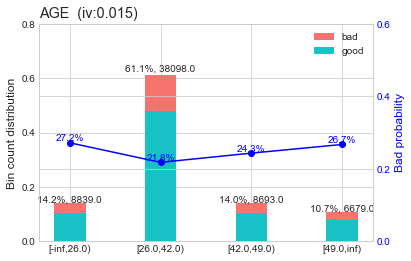

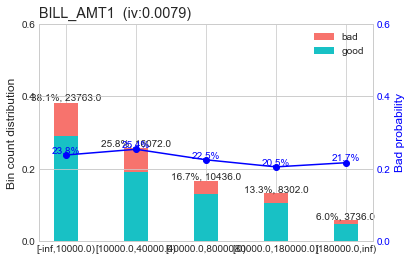

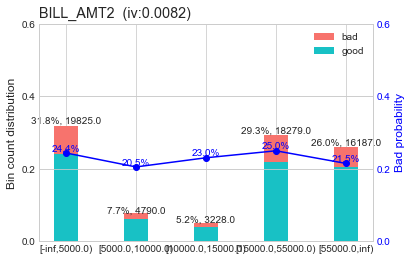

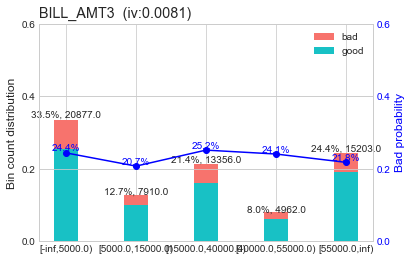

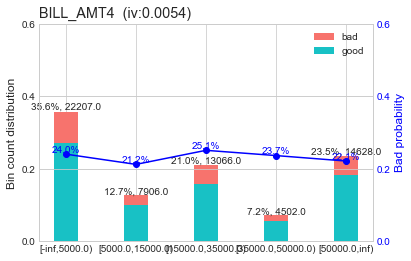

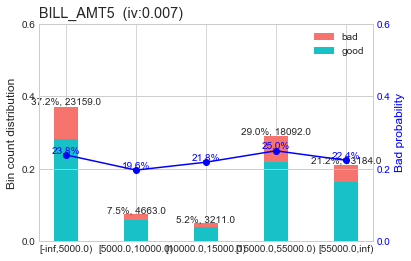

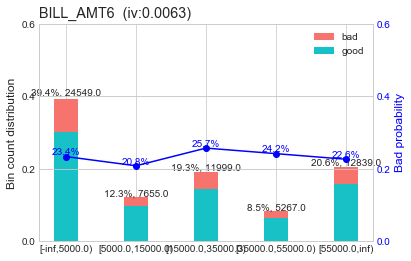

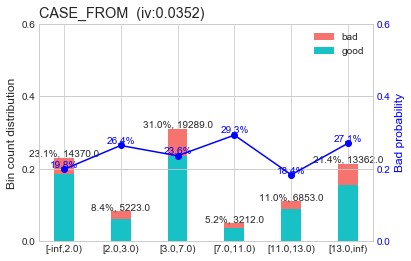

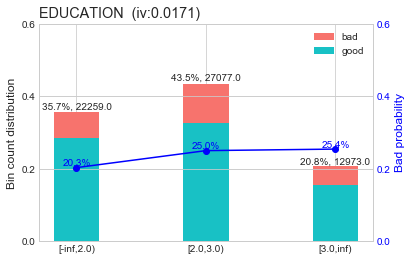

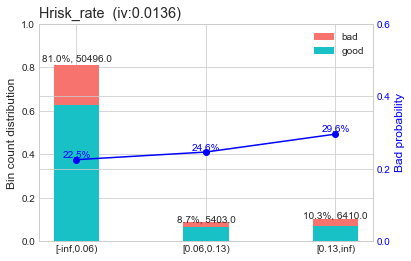

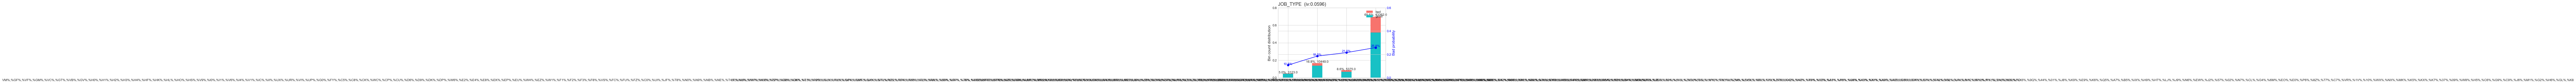

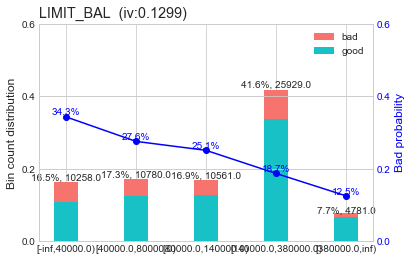

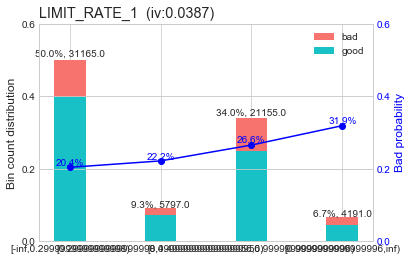

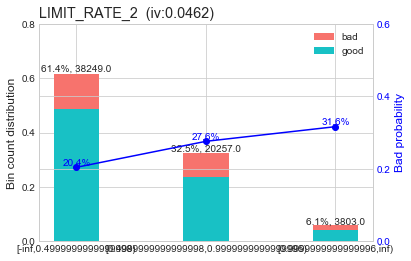

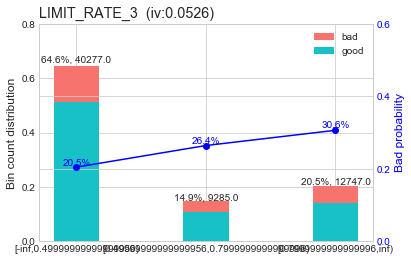

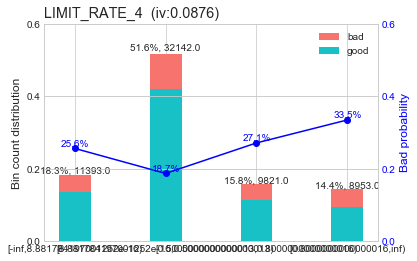

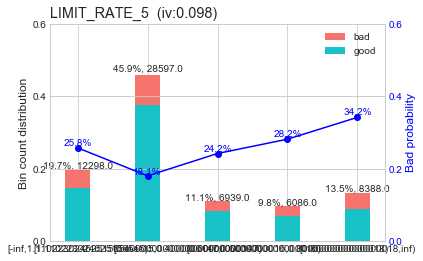

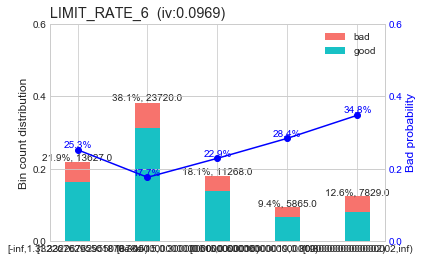

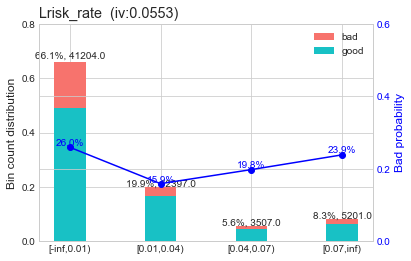

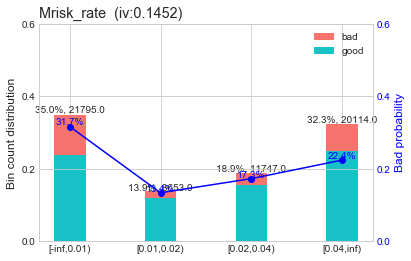

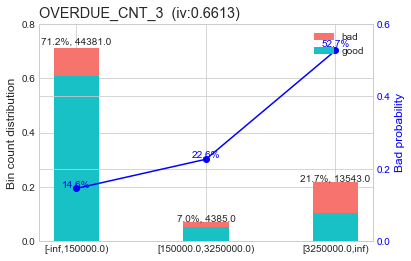

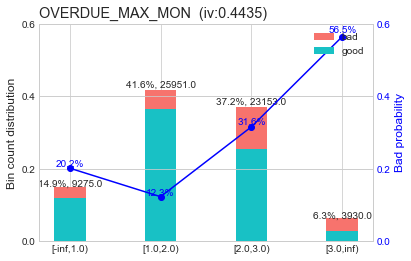

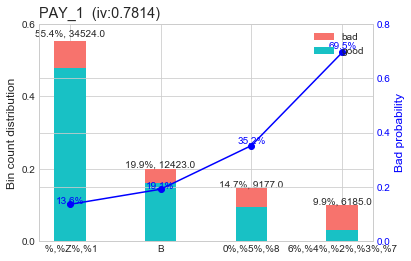

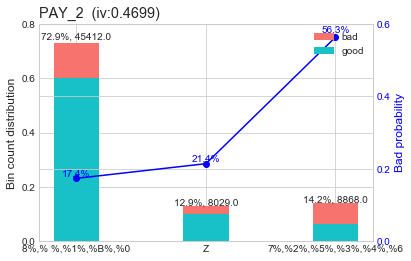

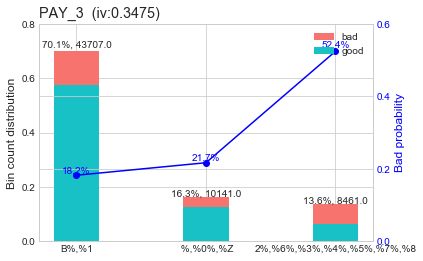

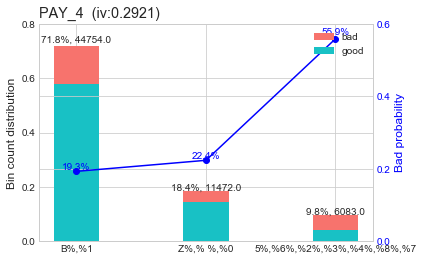

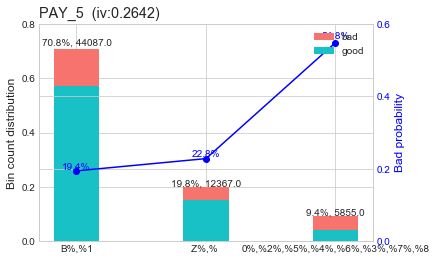

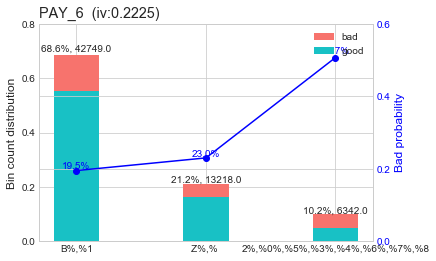

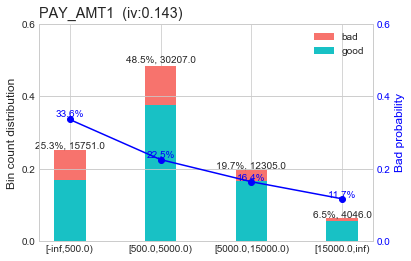

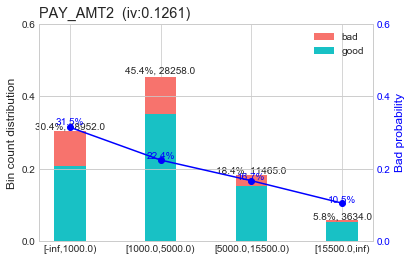

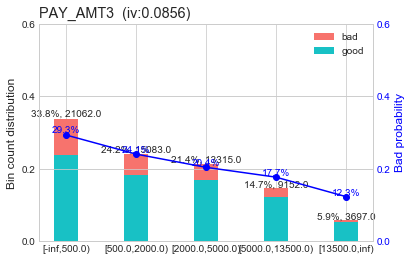

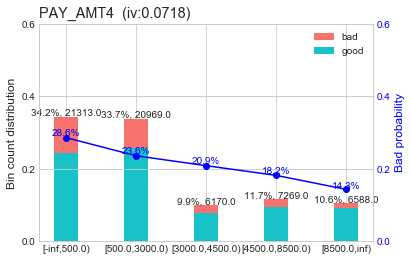

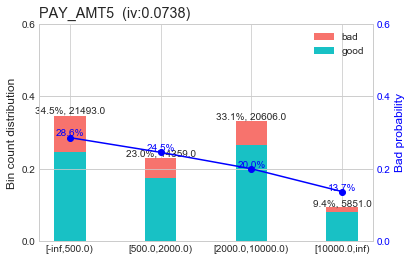

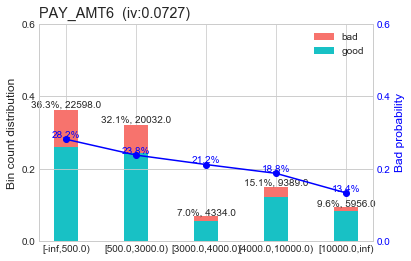

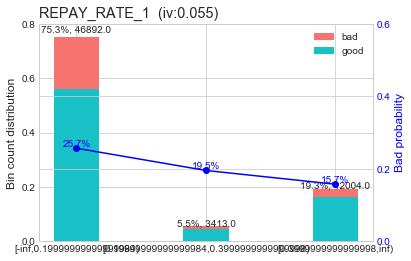

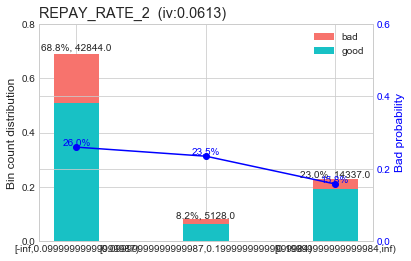

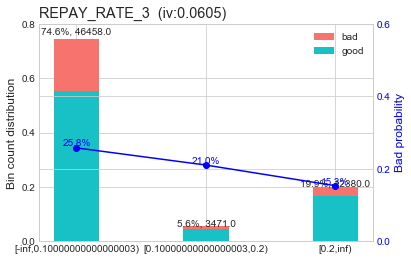

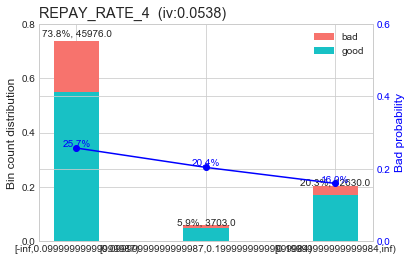

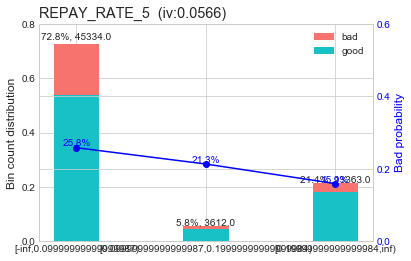

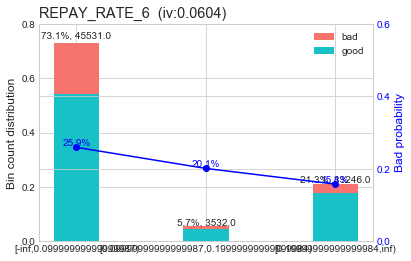

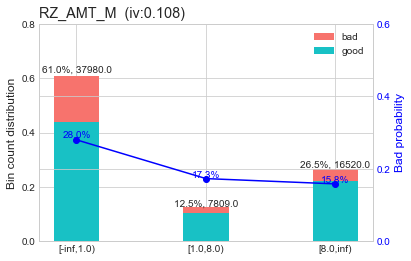

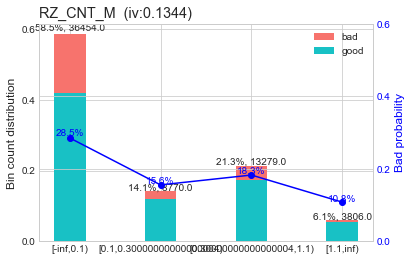

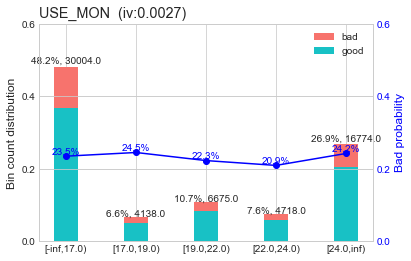

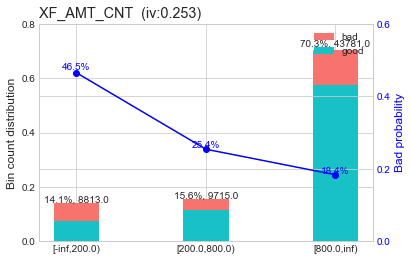

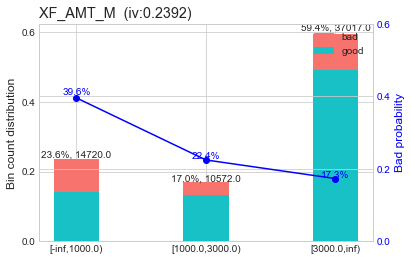

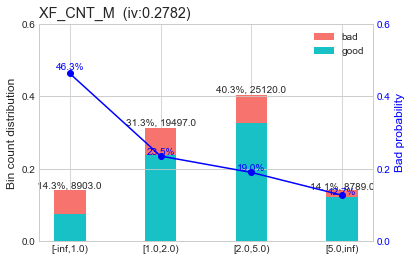

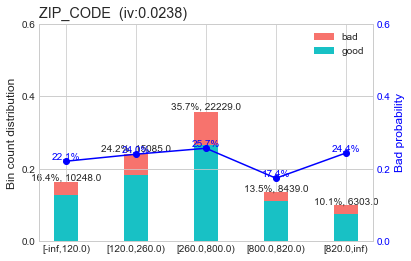

In [11]:
%matplotlib inline
woebin_plot(bins)

In [39]:
#删除IV值<0.02的变量
drop_list=[]
for key,value in bins.items():
    if value['total_iv'].iloc[0,]<0.02:
        drop_list.append(key)
for var in drop_list:
    del bins[var]
bins_adj=bins

In [ ]:
#将字典保存，用于后续预测调用
import pickle
# 以二进制的可写形式把数据写入到dat文件中
save_file = open('bins_adj.dat', 'wb')
# 调用pickle的dump方法，把信息写入到文件中
pickle.dump(bins_adj, save_file)
# 关闭文件
save_file.close()

In [40]:
bins_adj.keys()

dict_keys(['LIMIT_RATE_2', 'XF_CNT_M', 'PAY_3', 'LIMIT_RATE_6', 'REPAY_RATE_1', 'PAY_AMT4', 'LIMIT_RATE_1', 'PAY_6', 'JOB_TYPE', 'PAY_AMT3', 'PAY_1', 'REPAY_RATE_3', 'RZ_CNT_M', 'OVERDUE_MAX_MON', 'PAY_4', 'Lrisk_rate', 'XF_AMT_CNT', 'LIMIT_BAL', 'REPAY_RATE_2', 'PAY_5', 'LIMIT_RATE_4', 'PAY_AMT2', 'PAY_AMT1', 'ZIP_CODE', 'LIMIT_RATE_3', 'LIMIT_RATE_5', 'PAY_2', 'PAY_AMT6', 'Mrisk_rate', 'PAY_AMT5', 'OVERDUE_CNT_3', 'REPAY_RATE_6', 'REPAY_RATE_5', 'XF_AMT_M', 'RZ_AMT_M', 'REPAY_RATE_4', 'CASE_FROM'])

In [41]:
len(bins_adj.keys())

37

In [42]:
#生产训练集和测试集
keep_column_list=list(bins_adj.keys())
keep_column_list.append('loan_status')
data_model_woe = data_model_woe[keep_column_list]
train, test = split_df(data_model_woe[['OVERDUE_CNT_3', 'loan_status']], 'loan_status').values()
# breaking dt into train and test
train = data_model_woe.loc[train.index]
test = data_model_woe.loc[test.index]

In [44]:
train.shape

(43616, 38)

In [45]:
test.shape

(18693, 38)

In [76]:
#用WOE值替换训练集和测试集
# converting train and test into woe values
train_woe_all = pd.DataFrame()
test_woe_all = pd.DataFrame()
for i in tqdm(train.columns):
    train_woe = woebin_ply(train[[i]], bins_adj)
   # train_woe = train_woe[i+'_woe']
    train_woe_all = pd.concat([train_woe_all,train_woe],axis = 1)
    test_woe = woebin_ply(test[[i]], bins_adj)
  #  test_woe = test_woe[i+'_woe']
    test_woe_all = pd.concat([test_woe_all,test_woe],axis = 1)

train_woe = train_woe_all.copy()
test_woe = test_woe_all.copy()

y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']

100%|██████████████████████████████████████████| 38/38 [00:17<00:00,  5.36it/s]


In [48]:
X_train.head()

,LIMIT_RATE_2_woe,XF_CNT_M_woe,PAY_3_woe,LIMIT_RATE_6_woe,REPAY_RATE_1_woe,PAY_AMT4_woe,LIMIT_RATE_1_woe,PAY_6_woe,JOB_TYPE_woe,PAY_AMT3_woe,PAY_1_woe,REPAY_RATE_3_woe,RZ_CNT_M_woe,OVERDUE_MAX_MON_woe,PAY_4_woe,Lrisk_rate_woe,XF_AMT_CNT_woe,LIMIT_BAL_woe,REPAY_RATE_2_woe,PAY_5_woe,LIMIT_RATE_4_woe,PAY_AMT2_woe,PAY_AMT1_woe,ZIP_CODE_woe,LIMIT_RATE_3_woe,LIMIT_RATE_5_woe,PAY_2_woe,PAY_AMT6_woe,Mrisk_rate_woe,PAY_AMT5_woe,OVERDUE_CNT_3_woe,REPAY_RATE_6_woe,REPAY_RATE_5_woe,XF_AMT_M_woe,RZ_AMT_M_woe,REPAY_RATE_4_woe,CASE_FROM_woe
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.17640,0.00511,-0.31720,-0.35562,0.12160,0.00927,-0.17692,1.21230,-0.11292,0.30463,-0.66556,0.12627,0.26529,1.44493,1.42009,0.13567,-0.30856,0.09073,0.13717,1.37752,-0.28418,0.40612,0.50351,-0.37322,-0.17351,-0.32868,-0.11573,0.24703,-0.05760,0.26971,-0.04452,0.13406,0.12866,-0.05594,0.23941,-0.47714,0.30289
4,-0.17640,-0.26604,-0.31720,-0.35562,0.12160,-0.14854,-0.17692,-0.23274,0.12688,-0.17675,-0.66556,-0.13911,0.26529,-0.77897,-0.24650,-0.48124,-0.30856,-0.28360,0.00246,-0.23782,-0.28418,-0.05712,-0.05011,0.12058,-0.17351,-0.32868,-0.37603,-0.28202,-0.05760,-0.20122,-0.58270,-0.19602,-0.12195,-0.38039,0.23941,-0.17824,0.00884
6,-0.17640,-0.26604,1.28162,-0.35562,0.12160,0.00927,-0.17692,-0.23274,0.12688,0.30463,-0.25638,0.12627,0.26529,0.41123,-0.06146,0.13567,0.10674,-0.28360,0.13717,-0.23782,0.11862,0.40612,0.50351,0.12058,-0.17351,-0.32868,1.43879,0.24703,-0.05760,0.06111,1.29020,0.13406,-0.48105,-0.05594,0.23941,0.12403,-0.21197
7,-0.17640,-0.26604,-0.10024,0.09906,0.12160,0.26937,-0.17692,-0.02360,-0.30086,0.30463,-0.66556,0.12627,-0.31327,-0.19096,-0.06146,0.02359,-0.30856,-0.28360,0.13717,-0.03465,0.11862,0.40612,0.50351,0.03317,-0.17351,0.12765,-0.37603,0.24703,-0.05760,0.26971,-0.58270,0.13406,0.12866,-0.38039,-0.48616,0.12403,-0.21197
8,0.21905,-0.26604,1.28162,0.55524,0.12160,0.26937,0.16665,-0.23274,0.12688,-0.35281,-0.66556,0.12627,0.26529,0.41123,1.42009,0.13567,-0.30856,0.09073,0.13717,1.37752,0.49763,0.40612,-0.44249,0.05128,0.36666,0.52975,-0.37603,-0.13011,0.41484,-0.20122,1.29020,0.13406,0.12866,-0.38039,0.23941,0.12403,0.30289


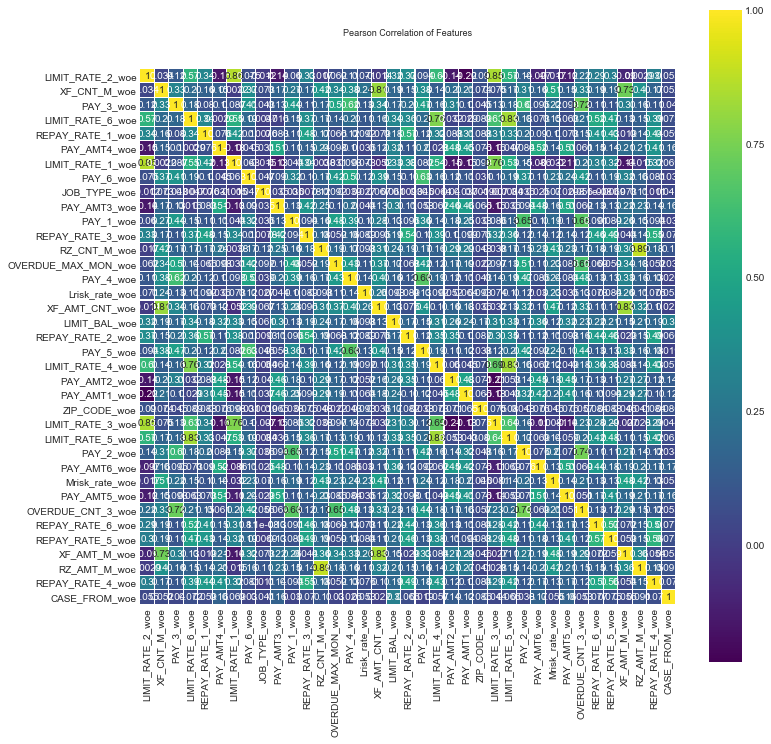

In [49]:
#查看变量之间的相关性
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=9)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True,xticklabels='auto')

In [77]:
#用逻辑回归，评估模型效果
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.9, solver='sag', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#保存模型
from sklearn.externals import joblib
joblib.dump(lr,'lr.model')

['lr.model']

In [39]:
len(X_train.columns)

37

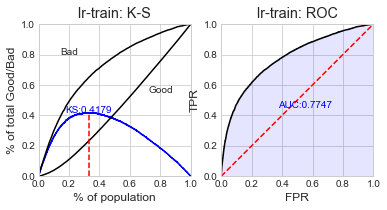

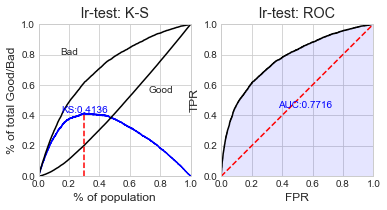

In [58]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = perf_eva(y_train, train_pred, title = "lr-train")
test_perf = perf_eva(y_test, test_pred, title = "lr-test")

In [36]:
test_pred

array([ 0.10688794,  0.20219238,  0.10371681, ...,  0.10142573,
        0.43111   ,  0.36812235])

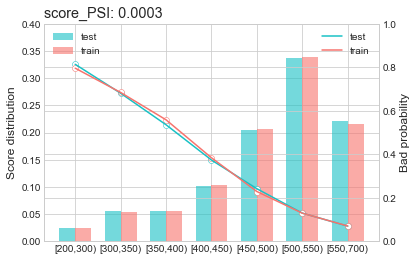

{'psi':   variable     PSI
 0    score 0.00025, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [71]:
#测试模型稳定性
# score ------
card = scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = scorecard_ply(train, card, print_step=0)
test_score = scorecard_ply(test, card, print_step=0)

# psi
perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [80]:
#用逻辑回归，评估模型效果
# logistic regression ------
from sklearn import ensemble,cross_validation, metrics
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.9, solver='sag', n_jobs=-1)
lr.fit(X_train, y_train)
#try 1: using default parameter
y_pred = lr.predict(X_test)
y_predprob = lr.predict_proba(X_test)[:,1]
print( "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("Recall :%.4g" % metrics.recall_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

y_pred2 = lr.predict(X_train)
y_predprob2 = lr.predict_proba(X_train)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred2))
print("Recall :%.4g" % metrics.recall_score(y_train, y_pred2))
print ("AUC Score (Training): %f" % metrics.roc_auc_score(y_train, y_predprob2))

Accuracy : 0.8051
Recall :0.3483
AUC Score (Testing): 0.771669
Accuracy : 0.8067
Recall :0.3486
AUC Score (Training): 0.774735


In [81]:
#用决策树，评估模型效果
from sklearn.tree import tree
from sklearn import ensemble,cross_validation, metrics
tree = tree.DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train,y_train)
#try 1: using default parameter
y_pred = tree.predict(X_test)
y_predprob = tree.predict_proba(X_test)[:,1]
print( "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("Recall :%.4g" % metrics.recall_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

y_pred2 = tree.predict(X_train)
y_predprob2 = tree.predict_proba(X_train)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred2))
print("Recall :%.4g" % metrics.recall_score(y_train, y_pred2))
print ("AUC Score (Training): %f" % metrics.roc_auc_score(y_train, y_predprob2))


Accuracy : 0.8067
Recall :0.3848
AUC Score (Testing): 0.754961
Accuracy : 0.8114
Recall :0.3978
AUC Score (Training): 0.761099


In [61]:
#保存模型
from sklearn.externals import joblib
joblib.dump(tree,'tree.model')

['tree.model']

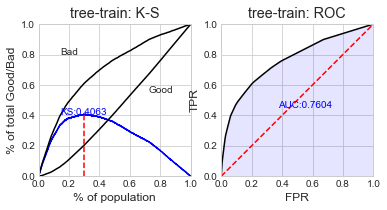

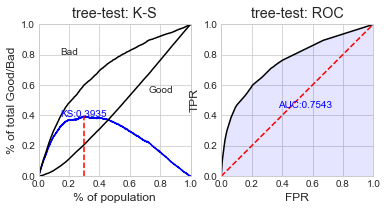

In [59]:
# predicted proability
train_pred = tree.predict_proba(X_train)[:,1]
test_pred = tree.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = perf_eva(y_train, train_pred, title = "tree-train")
test_perf = perf_eva(y_test, test_pred, title = "tree-test")

In [82]:
#用梯度提升树（GBDT），评估模型
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble,cross_validation, metrics
#try 1: using default parameter
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)
y_pred = gbm0.predict(X_test)
y_predprob = gbm0.predict_proba(X_test)[:,1]
print( "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("Recall :%.4g" % metrics.recall_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

y_pred2 = gbm0.predict(X_train)
y_predprob2 = gbm0.predict_proba(X_train)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred2))
print("Recall :%.4g" % metrics.recall_score(y_train, y_pred2))
print ("AUC Score (Training): %f" % metrics.roc_auc_score(y_train, y_predprob2))

Accuracy : 0.8097
Recall :0.3705
AUC Score (Testing): 0.784109
Accuracy : 0.8128
Recall :0.3774
AUC Score (Training): 0.791819


In [63]:
#保存模型
from sklearn.externals import joblib
joblib.dump(gbm0,'GBDT.model')

['GBDT.model']

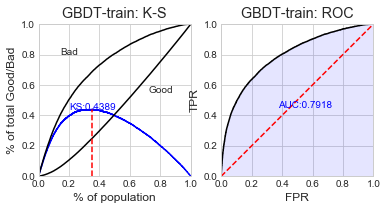

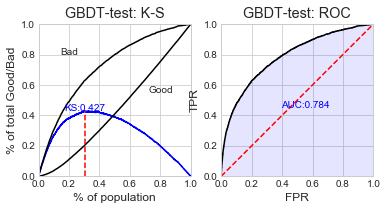

In [70]:
# predicted proability
train_pred = gbm0.predict_proba(X_train)[:,1]
test_pred = gbm0.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = perf_eva(y_train, train_pred, title = "GBDT-train")
test_perf = perf_eva(y_test, test_pred, title = "GBDT-test")

In [205]:
#输出变量重要性
allFeatures=X_train.columns
importances = gbm0.feature_importances_
#sort the features by importance in descending order. by default argsort returing asceding order
features_sorted = np.argsort(-importances)
import_feautres = [allFeatures[i] for i in features_sorted]
print(import_feautres)

['PAY_1_woe', 'OVERDUE_CNT_3_woe', 'JOB_TYPE_woe', 'LIMIT_BAL_woe', 'CASE_FROM_woe', 'XF_CNT_M_woe', 'OVERDUE_MAX_MON_woe', 'LIMIT_RATE_1_woe', 'ZIP_CODE_woe', 'RZ_CNT_M_woe', 'XF_AMT_M_woe', 'PAY_AMT2_woe', 'Mrisk_rate_woe', 'LIMIT_RATE_2_woe', 'Lrisk_rate_woe', 'REPAY_RATE_1_woe', 'LIMIT_RATE_3_woe', 'LIMIT_RATE_6_woe', 'PAY_5_woe', 'XF_AMT_CNT_woe', 'LIMIT_RATE_5_woe', 'PAY_AMT5_woe', 'PAY_AMT3_woe', 'PAY_AMT6_woe', 'PAY_4_woe', 'REPAY_RATE_4_woe', 'PAY_AMT1_woe', 'PAY_AMT4_woe', 'REPAY_RATE_2_woe', 'LIMIT_RATE_4_woe', 'PAY_3_woe', 'REPAY_RATE_3_woe', 'PAY_6_woe', 'RZ_AMT_M_woe', 'PAY_2_woe', 'REPAY_RATE_5_woe', 'REPAY_RATE_6_woe']


In [207]:
#生产评分卡
cards = pd.DataFrame()
for key,value in card.items():
    #print(value)
    cards = pd.concat([cards,value],axis = 0)
cards.to_csv("E:\studyingPy\C_card\C_card.csv",index = False)

In [236]:
cards

,variable,bin,points
0,basepoints,NaN,473.00000
19,LIMIT_RATE_2,"[-inf,0.4999999999999998)",3.00000
20,LIMIT_RATE_2,"[0.4999999999999998,0.9999999999999996)",-4.00000
21,LIMIT_RATE_2,"[0.9999999999999996,inf)",-7.00000
0,CASE_FROM,"[-inf,2.0)",8.00000
1,CASE_FROM,"[2.0,3.0)",-6.00000
2,CASE_FROM,"[3.0,7.0)",-0.00000
3,CASE_FROM,"[7.0,11.0)",-12.00000
4,CASE_FROM,"[11.0,13.0)",12.00000
5,CASE_FROM,"[13.0,inf)",-7.00000
